In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics, linear_model, model_selection
import matplotlib.pyplot as plt
from scipy import stats as stat
import random

roc_auc_scorer = metrics.make_scorer(metrics.roc_auc_score)

In [2]:
#Подгружаем данные

data = pd.read_csv('../Data/ML/train_test.csv', index_col=0)
data_valid = pd.read_csv('../Data/ML/validation.csv', index_col=0)


X = data.drop('index', axis=1)
y = list(map(int, data['index'] == 'HCM'))

X_valid = data_valid.drop('index', axis=1)
y_valid = list(map(int, data_valid['index'] == 'HCM'))

#X_valid_norm = scaler.fit_transform(X_valid)

In [3]:
print(X.shape)
print(X_valid.shape)

(145, 14830)
(16, 14830)


#             feature selection

In [253]:
# train test split and normalisation


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [254]:
C = np.array([10, 5, 1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.02])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


[<matplotlib.lines.Line2D at 0x7fd1925d5610>]

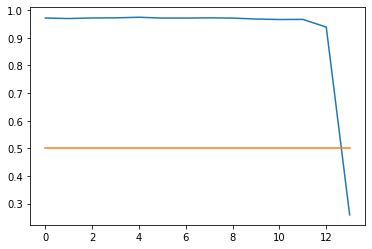

In [255]:
# Подбираем коэффициент регуляризации

result_df_train = pd.DataFrame()
result_df_test = pd.DataFrame()

for a in range(0,20):
    print(a)
    random_state = random.randint(1,100)
    roc_auc_train = list()
    roc_auc_test = list()
    for i in C:
        linear_regressor = linear_model.LogisticRegression(penalty='l1', C=i, solver='liblinear', random_state=random_state)
        linear_regressor.fit(X_train, y_train)
        roc_auc_train.append(np.mean(cross_val_score(linear_regressor, X_train, y_train, cv=3)))
        roc_auc_test.append(metrics.roc_auc_score(y_test, linear_regressor.predict(X_test)))
    result_df_train[a] = roc_auc_train
    result_df_test[a] = roc_auc_test

plt.plot(result_df_train.apply(np.mean, axis=1))
plt.plot(result_df_test.apply(np.mean, axis=1))

In [32]:
best_features = dict()
score_list = list()
ITER = 1000
for _ in range(0,ITER):
    random_state = random.randint(1,500)
    linear_regressor = linear_model.LogisticRegression(penalty='l1', C=C[11], solver='liblinear', random_state=random_state)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)
    linear_regressor.fit(X_train, y_train)
    mask = linear_regressor.coef_ != 0
    score = np.mean(cross_val_score(linear_regressor, X_test, y_test, cv=3))
    score_list.append(score)
    for i in X.columns[mask[0]]:
        if i in best_features:
            best_features[i]+=1/ITER*score
        else:
            best_features[i]=1/ITER*score

In [277]:
np.mean(score_list)

0.8439349206349207

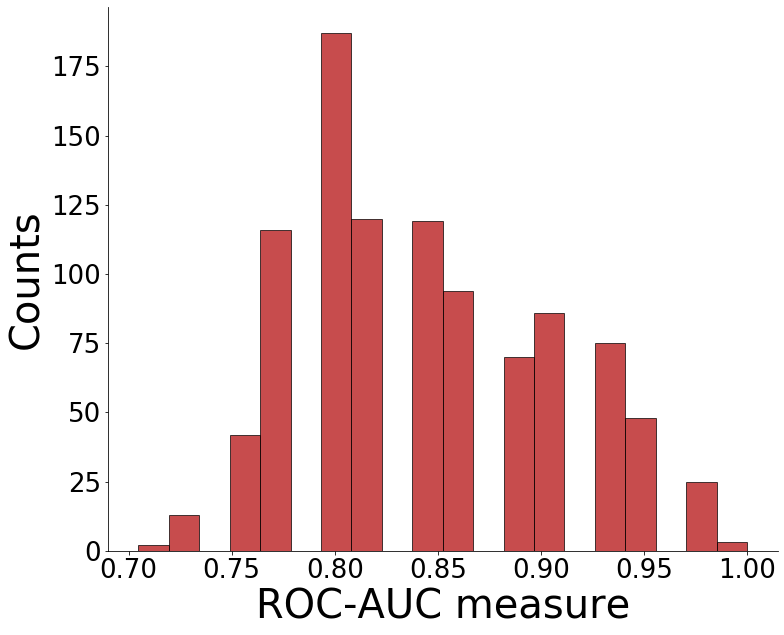

In [258]:
plt.figure(figsize=(12, 10))
plt.hist(score_list, bins=20, color=(176/255, 0, 2/255, 1), alpha=0.7, edgecolor='black')
plt.xlabel('ROC-AUC measure', fontsize=40)
plt.ylabel('Counts', fontsize=40)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
# Убираем верхнюю и правую границы осей
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


# Сохраняем гистограмму в файл
#plt.savefig('/Users/german/Dropbox/CardioCenter/Papers/2023/ML_miRNA/Results/histogram1_MC.png', dpi=300, bbox_inches='tight')

plt.show()

In [278]:
for k, v in best_features.items():
    if v > 0.6:
        print(k)

PIK3IP1
SMOC2
LMOD2
RASL11B
ACE2
SFRP1
TPM3
CENPA
FRZB
S100A9
PROS1
SERPINA3
RASD1
CA3
THBS4
CLIC6
